# Objective:•Use k-means clustering for image segmentation and to identify dominant color in the image

__Questions:__

##  Open and display the image “dog.jpeg”. Convert the image in to numpy array,so that i can be   used in further processing.

In [1]:
# load the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

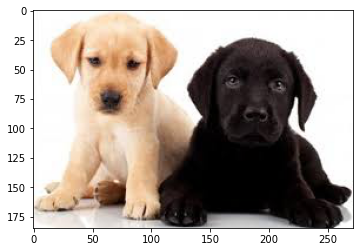

In [2]:
img = mpimg.imread('dogs.jpeg')
plt.imshow(img)

In [3]:
# reshape the data to [n_samples * n_features]
# rescale the colors so that they lie between 0 and 1

## 2. Find out the dimensions of the image and convert it in to a two-dimensional array.

In [4]:
img.shape

(185, 272, 3)

In [5]:
data = img/255.0 # use 0...1 scale
data = data.reshape(185*272,3)
data.shape

(50320, 3)

## 3.Use kmeans clustering with k set to 3 and cluster the image.

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,random_state = 42)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

## 4. Predict the cluster label of every pixel in the image and plot it back as an image.

In [7]:
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

Text(0.5, 1.0, 'Reduced-color Image')

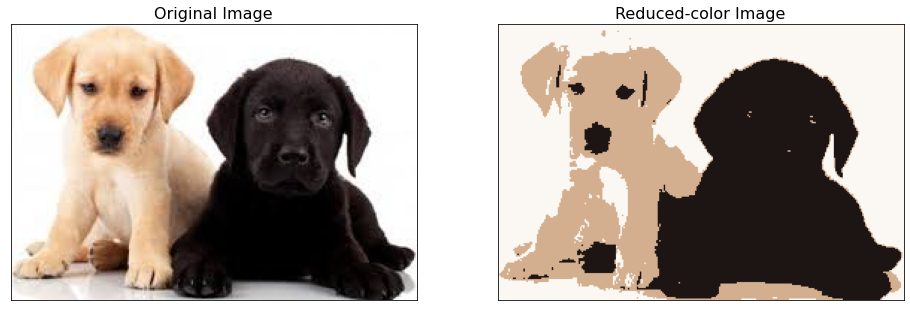

In [8]:
dogs_recolored = new_colors.reshape(img.shape)
fig,ax = plt.subplots(1,2,figsize = (16,6),subplot_kw = dict(xticks=[],yticks=[]))
ax[0].imshow(img)
ax[0].set_title('Original Image',size = 16)
ax[1].imshow(dogs_recolored)
ax[1].set_title('Reduced-color Image',size = 16)

## 5. Find out the three dominant color in the image.[Hint: The cluster centers should correspond to three dominant colors]


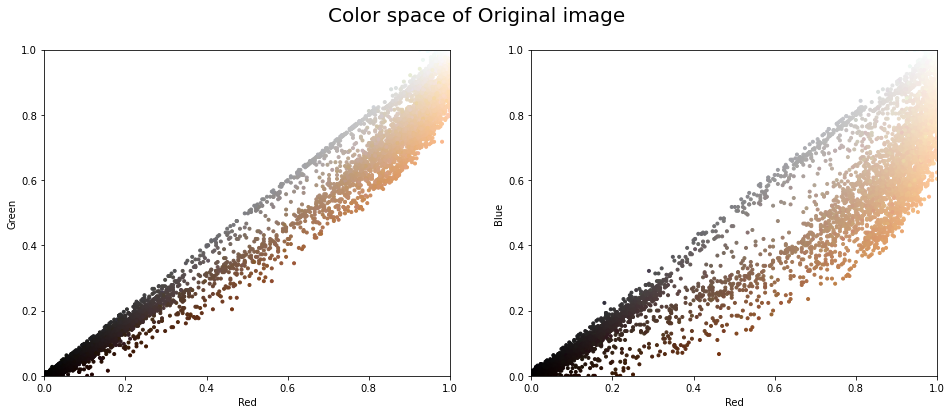

In [16]:
def plot_pixels(data,title,colors = None,N = 10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color = colors,marker = '.')
    ax[0].set(xlabel = 'Red',ylabel = 'Green',xlim = (0,1),ylim = (0,1))
    ax[1].scatter(R,B,color = colors,marker = '.')
    ax[1].set(xlabel = 'Red',ylabel = 'Blue',xlim = (0,1),ylim = (0,1))
    fig.suptitle(title,size = 20)
plot_pixels(data,title = 'Color space of Original image')

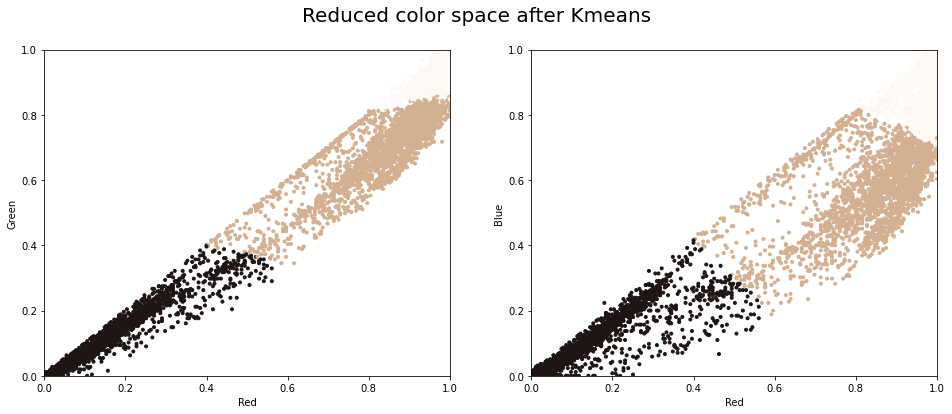

In [10]:
plot_pixels(data,colors = new_colors,title = "Reduced color space after Kmeans")